# 1D CNN temporal analysis

Os experimentos serão divididos em 


* Atividade PEL219 - GLWT MNIST - Gabriel Melo. Matrícula: 125.304-6

In [10]:
import numpy as np
import seaborn as sns
import kagglehub
import pandas as pd

from collections import Counter
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Classification with financial distress dataset
https://www.kaggle.com/datasets/shebrahimi/financial-distress/data

In [11]:
# Download latest version
path = kagglehub.dataset_download("shebrahimi/financial-distress")
df = pd.read_csv(path + "/Financial Distress.csv")
df

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,100.000,100.00,100.000,17.125,14.5,-7.0,37,0.436380,4,41
3668,422,11,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,91.500,130.50,132.400,20.000,14.5,-16.0,37,0.438020,5,42
3669,422,12,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,87.100,175.90,178.100,20.000,14.5,-20.2,37,0.482410,6,43
3670,422,13,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,92.900,203.20,204.500,22.000,22.0,6.4,37,0.500770,7,44


## Explorative Data Analysis

Basically, cleaning the data and reducing dimensionality if necessary.

In [15]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [ ]:
str(Counter(df['Company']))  #

'Counter({2: 14, 4: 14, 5: 14, 6: 14, 8: 14, 9: 14, 10: 14, 20: 14, 21: 14, 22: 14, 23: 14, 24: 14, 25: 14, 26: 14, 28: 14, 29: 14, 30: 14, 31: 14, 33: 14, 34: 14, 38: 14, 39: 14, 40: 14, 43: 14, 45: 14, 47: 14, 48: 14, 49: 14, 50: 14, 51: 14, 52: 14, 53: 14, 54: 14, 55: 14, 56: 14, 57: 14, 58: 14, 59: 14, 60: 14, 61: 14, 62: 14, 64: 14, 65: 14, 66: 14, 70: 14, 72: 14, 73: 14, 74: 14, 75: 14, 76: 14, 77: 14, 78: 14, 79: 14, 80: 14, 84: 14, 85: 14, 86: 14, 90: 14, 92: 14, 94: 14, 95: 14, 96: 14, 97: 14, 98: 14, 100: 14, 101: 14, 102: 14, 107: 14, 109: 14, 110: 14, 112: 14, 114: 14, 116: 14, 117: 14, 125: 14, 126: 14, 127: 14, 128: 14, 129: 14, 131: 14, 135: 14, 137: 14, 138: 14, 139: 14, 141: 14, 142: 14, 143: 14, 145: 14, 146: 14, 147: 14, 149: 14, 150: 14, 151: 14, 152: 14, 153: 14, 156: 14, 166: 14, 168: 14, 169: 14, 171: 14, 193: 14, 195: 14, 196: 14, 214: 14, 217: 14, 218: 14, 220: 14, 221: 14, 231: 14, 233: 14, 236: 14, 249: 14, 251: 14, 254: 14, 256: 14, 258: 14, 260: 14, 262: 14

In [11]:
def train_glwt(model: Sequential, X: np.array, Y: np.array, optimizer="adam", loss="categorical_crossentropy", metrics="categorical_accuracy", _epochs=10, _validation_split=.1, _callbacks=None):
    histories = []
    
    for i in range(1, len(model.layers)):
        for layer in model.layers[:i]:
            layer.trainable = False
        for layer in model.layers[i:]:
            layer.trainable = True

        model.compile(optimizer, loss, metrics=[metrics])
        
        if not _callbacks:
            histories.append(model.fit(x=X, y=Y, epochs=_epochs, validation_split=_validation_split))
        else:
            histories.append(model.fit(x=X, y=Y, epochs=_epochs, validation_split=_validation_split, callbacks=_callbacks))
            
    return histories

In [ ]:
model = Sequential()
model.add(Conv1D())
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))  # digit numbers

model.compile()

/home/melo/coding/machine-learning/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

hist = train_glwt(model, x_train, y_train, _callbacks=[es])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.9038 - loss: 0.3468 - val_categorical_accuracy: 0.9663 - val_loss: 0.1084
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.9735 - loss: 0.0904 - val_categorical_accuracy: 0.9828 - val_loss: 0.0670
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.9809 - loss: 0.0656 - val_categorical_accuracy: 0.9843 - val_loss: 0.0565
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.9834 - loss: 0.0545 - val_categorical_accuracy: 0.9848 - val_loss: 0.0501
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.9859 - loss: 0.0463 - val_categorical_accuracy: 0.9872 - val_loss: 0.0473
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.9874 - loss: 0.0403 - val_categorical_accuracy: 0.9883 - val_loss: 0.0403
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accu

## Testing

In [31]:
results = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [32]:
results_class = np.argmax(results, axis=1)

In [33]:
accuracy_score(results_class, y_test), precision_score(results_class, y_test, average="weighted"), recall_score(results_class, y_test, average="weighted"), f1_score(results_class, y_test, average="weighted")

(0.9911, 0.9911203518928025, 0.9911, 0.9911034643399369)

In [34]:
print(classification_report(y_test, results_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

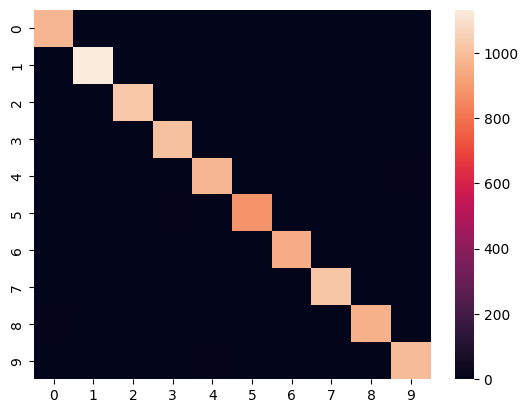

In [35]:
sns.heatmap(confusion_matrix(y_test, results_class))

## Training data (Displaying only the last layer)

In [36]:
hist = [h.history for h in hist]

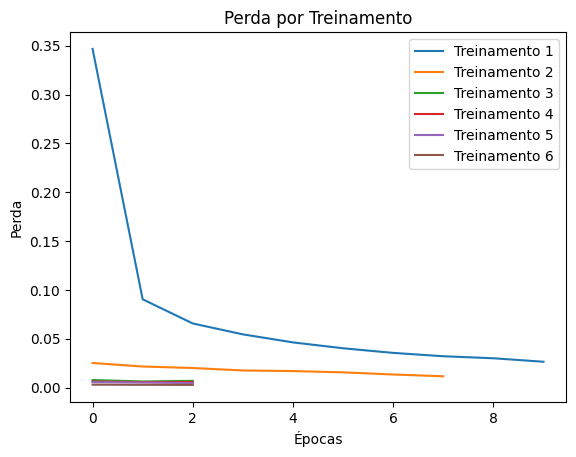

In [38]:
fig = plt.subplot(1,1,1)
for i, h in enumerate(hist):
    fig.plot(h['loss'], label=f'Treinamento {i+1}')
        
plt.title("Perda por Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.show()